#### Import necessary libraries

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt

#### Analyses of given DataSet

In [137]:
dataFrame = pd.read_csv('wine-quality-white-and-red.csv')
dataFrame.info()
dataFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [138]:
dataFrame

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [139]:
dataFrame.describe().transpose().applymap(lambda x: format(x, '.3f'))

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.000,7.215,1.296,3.800,6.400,7.000,7.700,15.900
volatile acidity,6497.000,0.340,0.165,0.080,0.230,0.290,0.400,1.580
citric acid,6497.000,0.319,0.145,0.000,0.250,0.310,0.390,1.660
residual sugar,6497.000,5.443,4.758,0.600,1.800,3.000,8.100,65.800
chlorides,6497.000,0.056,0.035,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497.000,30.525,17.749,1.000,17.000,29.000,41.000,289.000
total sulfur dioxide,6497.000,115.745,56.522,6.000,77.000,118.000,156.000,440.000
density,6497.000,0.995,0.003,0.987,0.992,0.995,0.997,1.039
pH,6497.000,3.219,0.161,2.720,3.110,3.210,3.320,4.010
sulphates,6497.000,0.531,0.149,0.220,0.430,0.510,0.600,2.000


In [140]:
dataFrame.groupby('type').mean().applymap(lambda x: format(x, '.3f')) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
white,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878


In [141]:
dataFrame_drop = dataFrame.drop(['type'], axis=1)

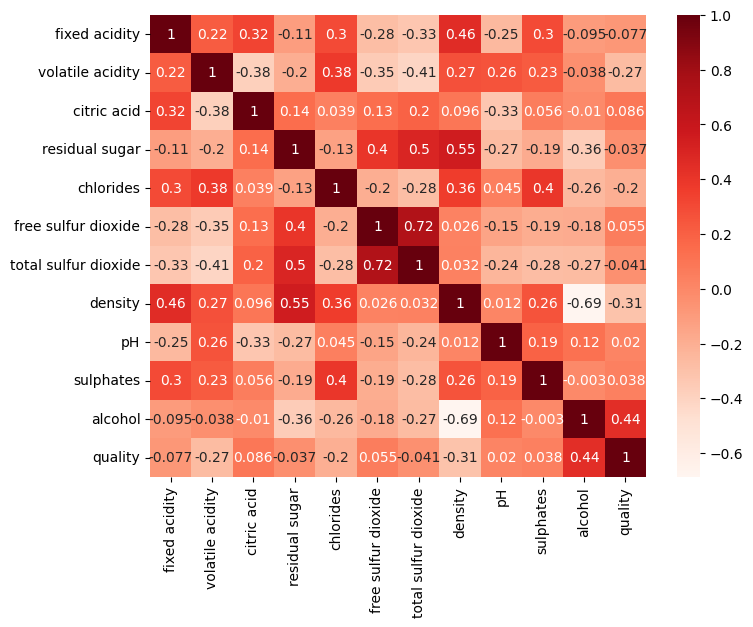

In [143]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataFrame_drop.corr(), annot=True, cmap='Reds')
plt.show()

In [145]:
attributes = dataFrame_drop.columns


# Create an empty list to store attribute statistics
summary_data = []

for attribute in attributes:
    attribute_data = dataFrame[attribute]
    mean = attribute_data.mean()
    median = attribute_data.median()
    mode = attribute_data.mode().values[0]
    std_dev = attribute_data.std()
    variation = attribute_data.var()
    min_value = attribute_data.min()
    max_value = attribute_data.max()
    
    # Calculate the range
    data_range = max_value - min_value

    # Append the attribute statistics to the list
    summary_data.append({
        "Attribute": attribute,
        "Mean": mean,
        "Median": median,
        "Mode": mode,
        "Standard Deviation": std_dev,
        "Variation": variation,
        "Range": [min_value, max_value]
    })

# Create the summary DataFrame from the list of attribute statistics
summary_df = pd.DataFrame(summary_data)

summary_df

,Attribute,Mean,Median,Mode,Standard Deviation,Variation,Range
0,fixed acidity,7.215307,7.00000,6.8000,1.296434,1.680740,"[3.8, 15.9]"
1,volatile acidity,0.339666,0.29000,0.2800,0.164636,0.027105,"[0.08, 1.58]"
2,citric acid,0.318633,0.31000,0.3000,0.145318,0.021117,"[0.0, 1.66]"
3,residual sugar,5.443235,3.00000,2.0000,4.757804,22.636696,"[0.6, 65.8]"
4,chlorides,0.056034,0.04700,0.0440,0.035034,0.001227,"[0.009, 0.611]"
5,free sulfur dioxide,30.525319,29.00000,29.0000,17.749400,315.041192,"[1.0, 289.0]"
6,total sulfur dioxide,115.744574,118.00000,111.0000,56.521855,3194.720039,"[6.0, 440.0]"
7,density,0.994697,0.99489,0.9972,0.002999,0.000009,"[0.98711, 1.03898]"
8,pH,3.218501,3.21000,3.1600,0.160787,0.025853,"[2.72, 4.01]"
9,sulphates,0.531268,0.51000,0.5000,0.148806,0.022143,"[0.22, 2.0]"


#### Prediction